In [19]:
import random
import matplotlib.pyplot as plt
import numpy as np
from operator import add

In [20]:
import random
# --- Bandit ---
class Bandit(object):
  def __init__(self, N):
    # N = number of arms
    self.N = N

    expRewards = [1]*10 # SAME initial rewards
    self.expRewards = expRewards
  def actions(self):
    return list(range(0,self.N))
  def reward(self, action):
    prob=[]
    for i in range(self.N):
      prob.append(0.1*i)
    if (random.random()<prob[action]):
      reward =1
    else:
      reward=0
    return reward
  def nonStatReward(self,action):
    mu, sigma = 0, 0.01 # mean and standard deviation
    s = np.random.normal(mu, sigma, self.N)
    newRewards=list( map(add, self.expRewards, s) )
    self.expRewards=newRewards
    # print(newRewards)
    return newRewards[action]

In [21]:
#method =1 for stat rewards
#method =2 for non stat rewards


def eGreedy(myBandit, epsilon, max_iteration=1000,method=1):
  # Initialization
  Q = [0]*myBandit.N
  count = [0]*myBandit.N
  epsilon = epsilon
  r = 0
  R = []
  R_avg = [0]*1
  max_iter = max_iteration
  # Incremental Implementation
  for iter in range(1,max_iter):
    if random.random() > epsilon:
      action = Q.index(max(Q)) # Exploit/ Greed
    else:
      action = random.choice(myBandit.actions()) # Explore
    if(method==1):
      r = myBandit.reward(action)
    else:
      r=myBandit.nonStatReward(action)
    R.append(r)
    count[action] = count[action]+1
    Q[action] = Q[action]+(r - Q[action])/count[action] #averaging over value
    R_avg.append(R_avg[iter-1] + (r-R_avg[iter-1])/iter)
  print(count)

  return Q, R_avg, R

In [22]:
def modeGreedy(myBandit, epsilon, max_iteration,method=1,alpha=0.7):
  # Initialization
  Q = [0]*myBandit.N
  count = [0]*myBandit.N
  epsilon = epsilon
  r = 0
  R = []
  R_avg = [0]*1
  max_iter = max_iteration
  # Incremental Implementation
  for iter in range(1,max_iter):
    if random.random() > epsilon:
      action = Q.index(max(Q)) # Exploit/ Greed
    else:
      action = random.choice(myBandit.actions()) # Explore
    if(method==1):
      r = myBandit.reward(action) #Stationary rewards
    else:
      r=myBandit.nonStatReward(action) #Non Stationary rewards
    R.append(r)
    count[action] = count[action]+1
    Q[action] = Q[action]+(r - Q[action])*alpha; #assigning more weights to the current reward
    R_avg.append(R_avg[iter-1] + (r-R_avg[iter-1])/iter)
  # print(count)

  return Q, R_avg, R

[1122, 8877]


Text(0.5, 0, 'no. of steps')

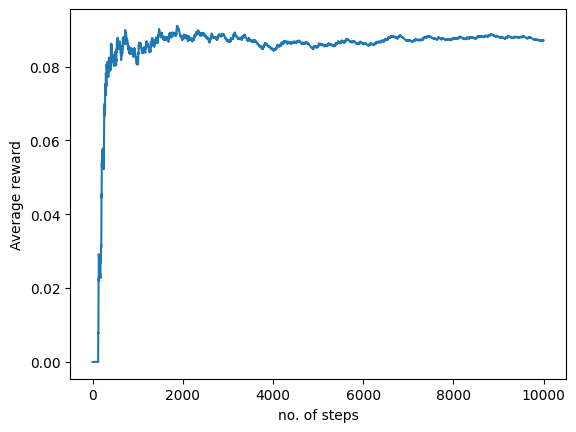

In [23]:
N = 2
myBandit = Bandit(N)
# myBandit.N
# myBandit.expRewards
# myBandit.actions()
# myBandit.reward(action)
Q, R_avg, R = eGreedy(myBandit, 0.2, 10000,1)
# print(Q)
# print(R_avg)
# print(R)
plt.plot(R_avg)
plt.ylabel("Average reward")
plt.xlabel("no. of steps")

[207, 218, 215, 204, 195, 192, 190, 197, 205, 8176]


Text(0.5, 0, 'no. of steps')

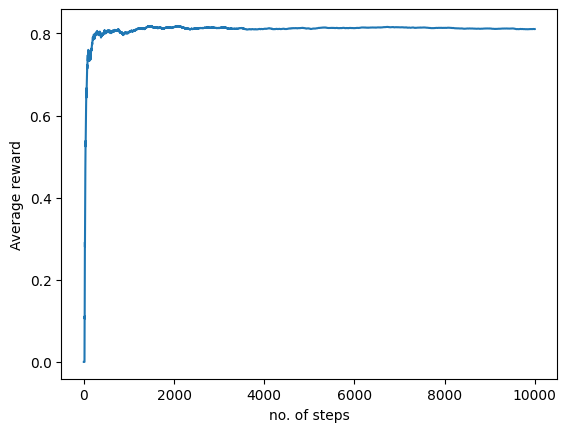

In [24]:
N = 10
myBandit = Bandit(N)
# myBandit.N
# myBandit.expRewards
# myBandit.actions()
# myBandit.reward(action)
Q, R_avg, R = eGreedy(myBandit, 0.2, 10000,1)
# print(Q)
# print(R_avg)
# print(R)
plt.plot(R_avg)
plt.ylabel("Average reward")
plt.xlabel("no. of steps")

Text(0.5, 0, 'no. of steps')

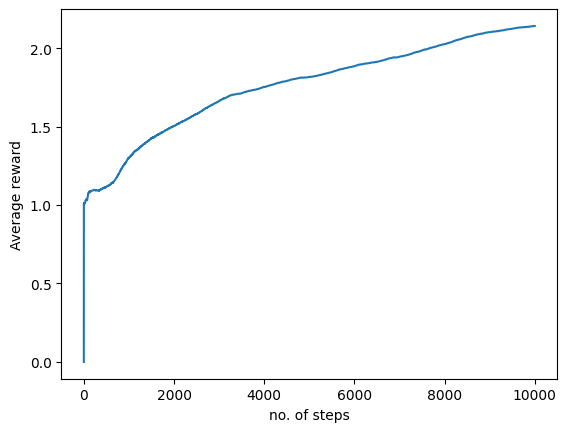

In [26]:
N = 10
myBandit = Bandit(N)
# myBandit.N
# myBandit.expRewards
# myBandit.actions()
# myBandit.reward(action)
Q, R_avg, R = modeGreedy(myBandit, 0.2, 10000,2)
# print(Q)
# print(R_avg)
# print(R)
plt.plot(R_avg)
plt.ylabel("Average reward")
plt.xlabel("no. of steps")